In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('tested.csv')


print("First 5 rows:")
print(df.head())



First 5 rows:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [6]:

print("\nDataset shape (rows, columns):", df.shape)


print("\nDataset info:")
print(df.info())



Dataset shape (rows, columns): (418, 12)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [7]:

missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)



Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:

print("\nSummary statistics for numeric features:")
print(df.describe())


print("\nSummary statistics for categorical features:")
print(df.describe(include='object'))



Summary statistics for numeric features:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  

Summary statistics for categorical fea

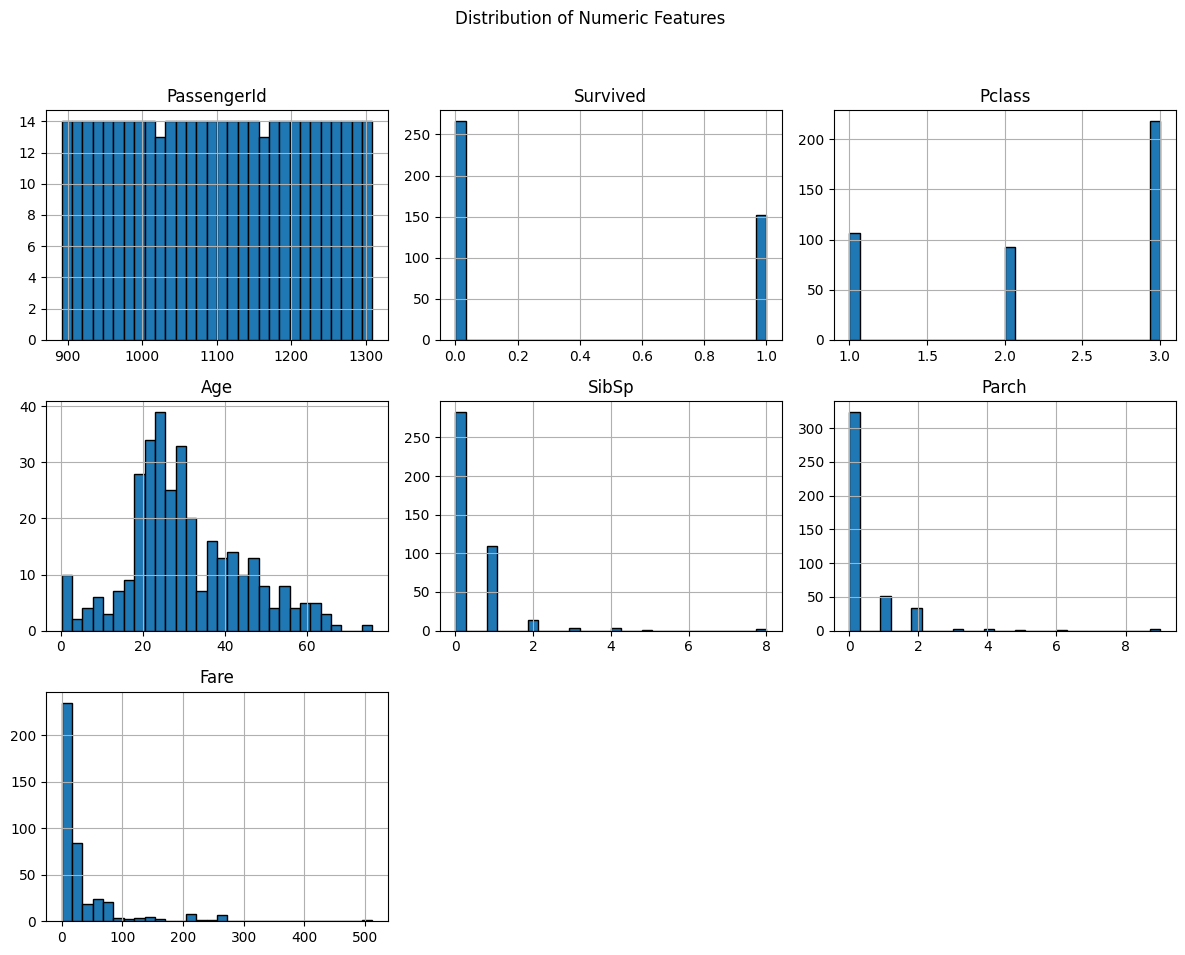

In [9]:

df.hist(figsize=(12,10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numeric Features")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


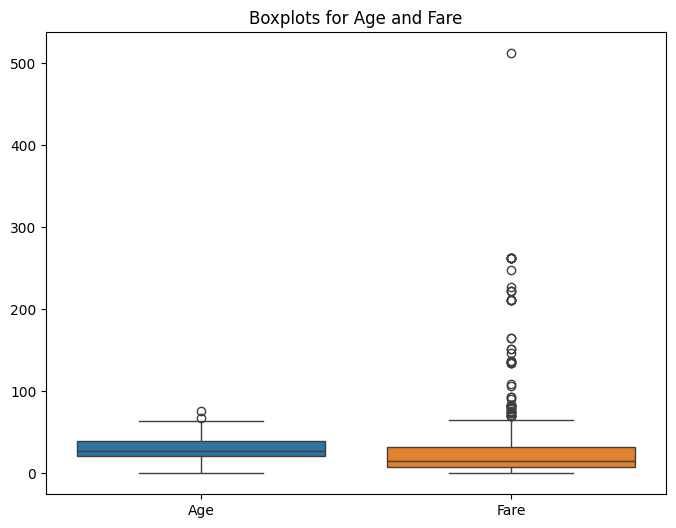

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplots for Age and Fare")
plt.show()


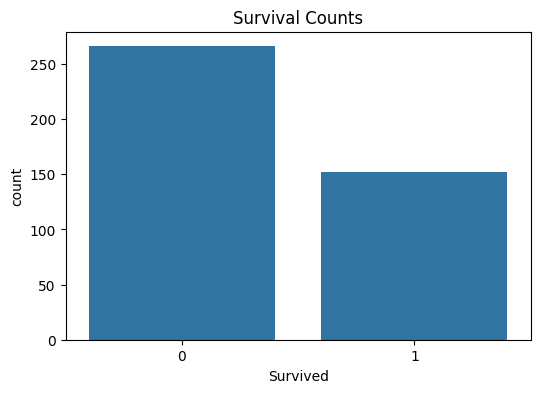

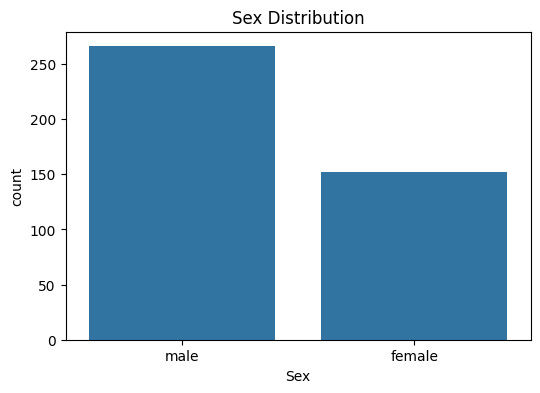

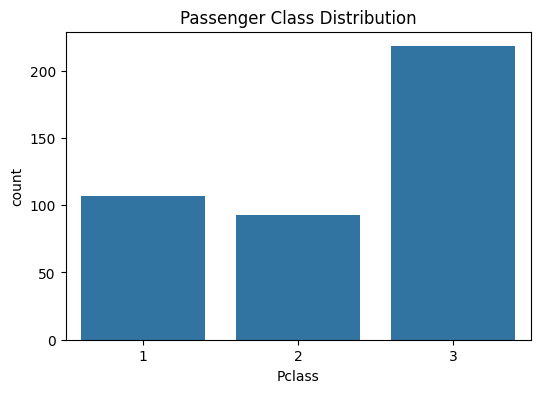

In [11]:

plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Counts')
plt.show()


plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df)
plt.title('Sex Distribution')
plt.show()


plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()


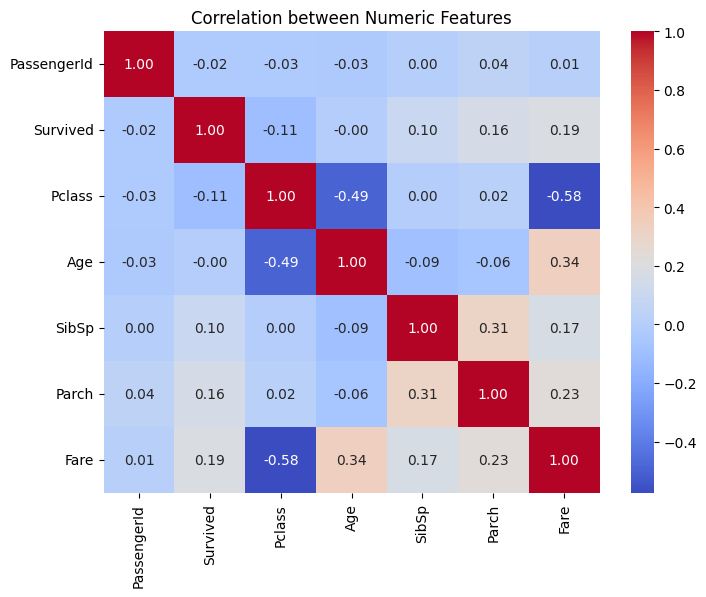

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Numeric Features")
plt.show()


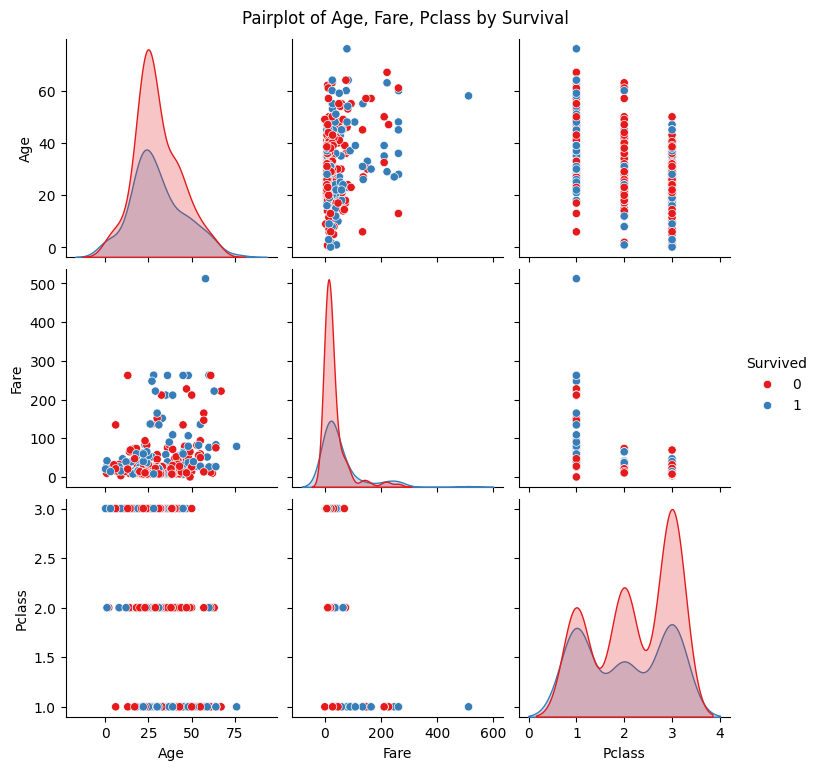

In [14]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']].dropna(), hue='Survived',
             diag_kind='kde', palette='Set1')
plt.suptitle("Pairplot of Age, Fare, Pclass by Survival", y=1.02)
plt.show()



Survival rates by Sex and Pclass:
      Sex  Pclass  Survived
0  female       1       1.0
1  female       2       1.0
2  female       3       1.0
3    male       1       0.0
4    male       2       0.0
5    male       3       0.0


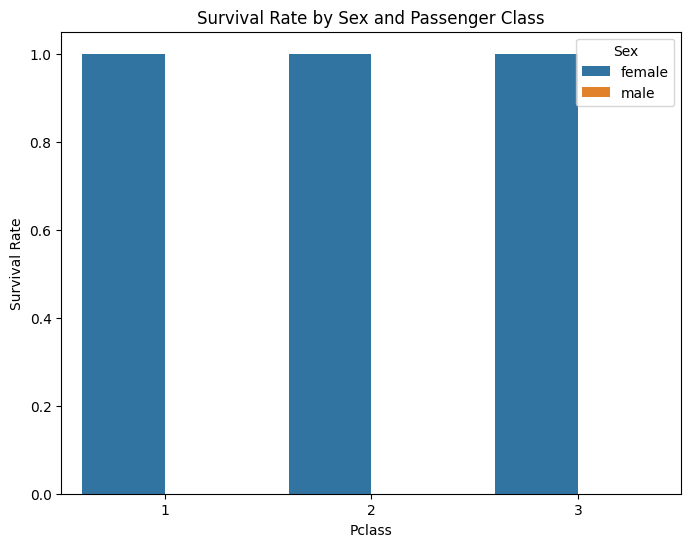

In [15]:

survival_rates = df.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()
print("\nSurvival rates by Sex and Pclass:")
print(survival_rates)


plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=survival_rates)
plt.title('Survival Rate by Sex and Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
